# This is a Regression Analysis of Birthweight Dataset

# Imports, Descriptive stats & Base Modeling

In [3]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# specifying file name
file = './__datasets/birthweight_low.xlsx'


# reading the file into Python
birthweight = pd.read_excel(io     = file,
                           usecols = 'A:R')


# outputting the first ten rows of the dataset
birthweight.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [4]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [5]:
# Information about each variable
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


DISCALIMER

1. Note that fmaps and omaps are irrelevant for bwght prediction because
these variables happen after birthweight measurement

2. Note that drink and cigs have a strong negative correlation to birthweight.

3. Mage and fage are also quite significant in determining birthweight

In [6]:
# correlation matrix of the dataset based on the dependent variable alone
birthweight_all_corr = birthweight.corr(method = 'pearson')

# filtering the results to only show correlations with bwght
birthweight_all_corr.loc[ : ,"bwght"].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
omaps     0.25
fmaps     0.25
feduc     0.14
mblck     0.13
fblck     0.12
male      0.11
meduc     0.10
npvis     0.06
moth     -0.02
fwhte    -0.04
monpre   -0.05
foth     -0.08
mwhte    -0.11
fage     -0.40
mage     -0.46
cigs     -0.57
drink    -0.74
Name: bwght, dtype: float64

In [7]:
# correlation matrix of all the explanatory variables
birthweight_all_corr.round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
mage,1.00,-0.10,0.16,-0.05,0.58,-0.09,-0.21,-0.24,0.17,0.34,-0.05,0.01,-0.02,0.02,-0.08,0.04,0.05,-0.46
meduc,-0.10,1.00,-0.24,0.14,-0.07,0.63,0.26,0.14,0.10,-0.07,-0.03,-0.28,-0.19,0.47,-0.19,-0.24,0.43,0.10
monpre,0.16,-0.24,1.00,-0.34,0.04,-0.33,-0.17,-0.08,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07,-0.05
npvis,-0.05,0.14,-0.34,1.00,-0.06,0.03,0.09,0.09,0.04,-0.07,0.00,0.04,-0.09,0.06,0.04,-0.07,0.03,0.06
fage,0.58,-0.07,0.04,-0.06,1.00,-0.01,-0.16,-0.20,0.17,0.29,-0.09,0.04,-0.06,0.03,-0.03,-0.03,0.06,-0.40
feduc,-0.09,0.63,-0.33,0.03,-0.01,1.00,0.34,0.14,0.05,-0.12,0.08,-0.42,-0.13,0.52,-0.36,-0.15,0.54,0.14
omaps,-0.21,0.26,-0.17,0.09,-0.16,0.34,1.00,0.64,-0.15,-0.18,-0.01,-0.18,-0.02,0.19,-0.12,-0.01,0.13,0.25
fmaps,-0.24,0.14,-0.08,0.09,-0.20,0.14,0.64,1.00,-0.09,-0.16,-0.03,-0.02,-0.07,0.09,0.01,-0.04,0.04,0.25
cigs,0.17,0.10,-0.06,0.04,0.17,0.05,-0.15,-0.09,1.00,0.36,-0.12,0.03,-0.20,0.17,-0.01,-0.19,0.21,-0.57
drink,0.34,-0.07,0.02,-0.07,0.29,-0.12,-0.18,-0.16,0.36,1.00,-0.09,0.16,-0.11,-0.04,0.07,-0.10,0.02,-0.74


The correlation matrix above is done to make sure I do not put features together that causes multicollinearity
when doing feature engineering

In [8]:
# descriptive statistics for numerical data
birthweight.describe(include = 'number').round(decimals = 2)


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


Key takeaways:
- Note that over 50 % of mothers smoke half a packet a day
- Also over 50 % have 5 alcoholic drinks per week
- Average normal birthweight is between 2500-4500 g. 
- Meaning in this dataset approx. 25 % are under normal birthweight.


Research about birthweight normalcy seen below

Healthwise Staff. (n.d.). Physical growth in newborns. Physical Growth in Newborns | Michigan Medicine. 
Retrieved November 23, 2021, from https://www.uofmhealth.org/health-library/te6295. 

# Review of Missing Value Analysis and Imputation

In [9]:
# Looking for missing values in the dataset
birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [10]:
# showing the exact rows with missing values to determine imputation
birthweight.loc[birthweight.isnull().any(axis=1)]

# Data below shows that meduc and feduc seem to be similar.
# Npvis increase as education of parents increase. 
# The only one which looks like an outlier is row 0 (does not fit the trend) 
# I am still deciding to impute with the median because these variables are grouped as intervals.

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
73,47,15.0,2,NaN,39,17.0,9,9,19,7,1,0,0,1,0,0,1,3170
74,42,13.0,7,11.0,26,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
99,51,17.0,6,8.0,38,NaN,8,9,17,6,0,0,1,0,0,0,1,3459
111,38,NaN,1,NaN,34,17.0,7,9,11,7,1,0,0,1,0,0,1,3610
114,43,NaN,1,9.0,36,NaN,8,9,5,8,1,0,0,1,0,0,1,3620
153,37,12.0,8,5.0,40,NaN,7,9,4,0,1,0,1,0,0,0,1,3799
164,36,12.0,3,6.0,31,NaN,7,9,16,2,0,0,1,0,0,0,1,3900
185,38,12.0,2,NaN,32,14.0,9,9,13,0,1,0,1,0,0,1,0,4210
191,30,12.0,5,12.0,38,NaN,5,7,3,2,1,0,1,0,0,0,1,4610


In [11]:
# instantiating an imputation value with median seen from descriptive stats
fill_educ = 14
fill_npvis = 12


# imputing for 'meduc'
birthweight['meduc'] = birthweight['meduc'].fillna(fill_educ)

# imputing 'npvis'
birthweight['npvis'] = birthweight['npvis'].fillna(fill_npvis)

# imputing 'feduc'
birthweight['feduc'] = birthweight['feduc'].fillna(fill_educ)



In [12]:
# making sure all missing values have been taken care of
birthweight.isnull().any().any()

False

# Transforming to log variables

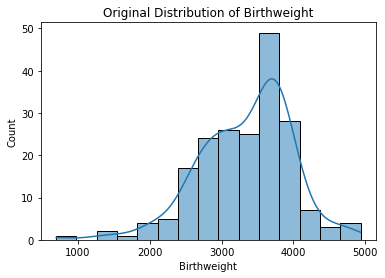

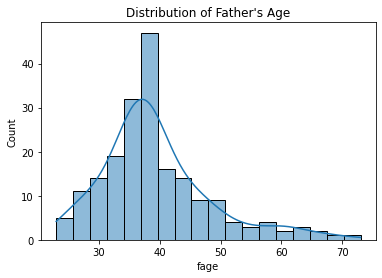

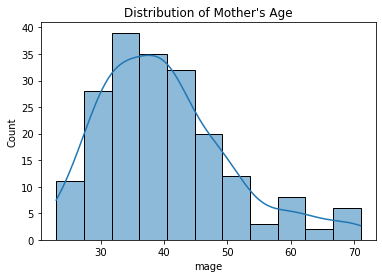

In [13]:
# First creating histogram for continous variables

# hisogram for bwght
sns.histplot(data  = birthweight,
            x      = "bwght",
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# histogram for fage
sns.histplot(data   = birthweight,
             x      = 'fage', # partly positively skewed
             kde    = True)

# title and labels
plt.title("Distribution of Father's Age")

# rendering the plot
plt.show()

# histogram for mage
sns.histplot(data   = birthweight,
             x      = 'mage', # positively skewed
             kde    = True)

# title and labels
plt.title("Distribution of Mother's Age")

# rendering the plot
plt.show()


In [14]:
print(f"""

Count of Parent's Age (continuous data)
---------------------
Father's Age
----------
{birthweight['fage'].value_counts(normalize = False).sort_index()}

---------------------
Mother's Age
----------
{birthweight['mage'].value_counts(normalize = False).sort_index()}

""")



Count of Parent's Age (continuous data)
---------------------
Father's Age
----------
23     2
24     1
25     2
26     7
27     1
28     3
29     5
30     5
31     4
32     6
33     5
34     8
35    15
36    17
37    11
38    16
39    20
40     5
41     5
42     6
43     8
44     4
45     2
46     6
47     3
48     4
49     4
50     1
51     2
53     2
54     2
55     1
58     3
59     1
61     2
62     3
66     1
67     1
68     1
73     1
Name: fage, dtype: int64

---------------------
Mother's Age
----------
23     2
24     3
25     2
26     2
27     2
28     4
29    10
30     8
31     6
32     8
33    12
34     9
35     5
36     5
37     7
38    12
39     7
40     9
41     8
42    14
43     5
44     5
45     1
46     2
47     6
48     7
49     4
50     4
51     4
52     2
53     2
54     1
56     1
57     1
58     2
59     1
60     1
61     3
62     1
64     2
67     1
68     1
69     1
70     1
71     2
Name: mage, dtype: int64




In [15]:
# log transforming continuos explanatory features 

# specifically for bwght (Y - variable)
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# specifically for fage (X-variable)
birthweight['log_fage'] = np.log(birthweight['fage'])

# specifically for mage (X-variable)
birthweight['log_mage'] = np.log(birthweight['mage'])

In [16]:
# log correlations between fage and bwght
birthweight['log_fage'] = np.log(birthweight['fage'])


log_corr = birthweight.loc[ : , ['fage',
                             'log_fage',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['fage', 'log_fage'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
fage,-0.40,-0.41
log_fage,-0.38,-0.39


In [17]:
# log correlations between mage and bwght
birthweight['log_mage'] = np.log(birthweight['mage'])


log_corr = birthweight.loc[ : , ['mage',
                             'log_mage',
                             'bwght',
                             'log_bwght']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['mage', 'log_mage'],
              ['bwght', 'log_bwght']   ]

,bwght,log_bwght
mage,-0.46,-0.50
log_mage,-0.42,-0.44


Even though the highest correlation is between log_bwght and fage as well as 
log_bwght and mage, this did not help improve my R-squared further below in predictive modeling.
You will therefore see that I will not use log_bwght further.

In [18]:
# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs

# Developing Trend-Based Features

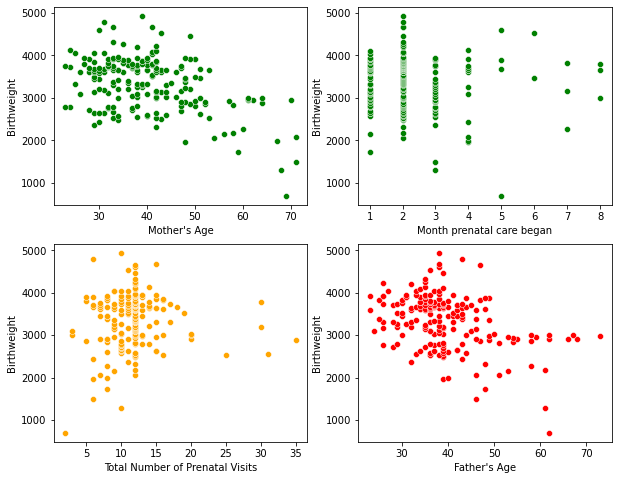

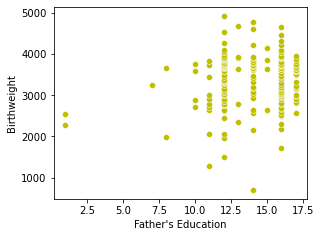

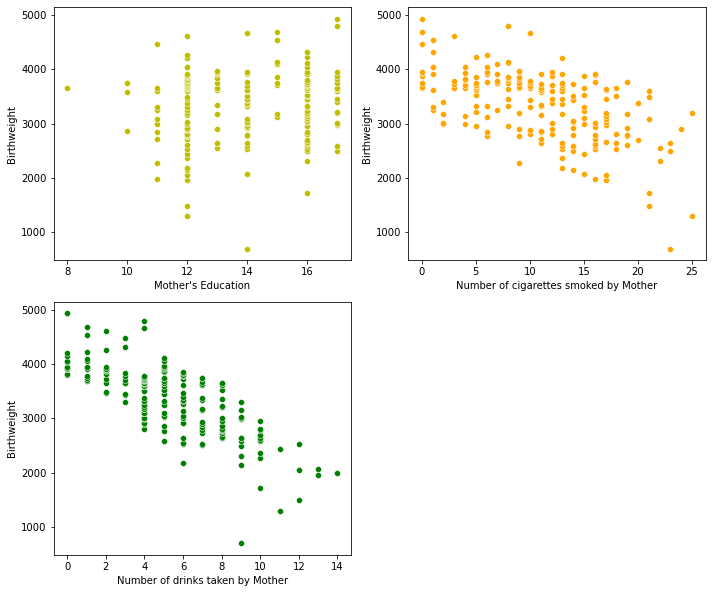

In [19]:
########################
# Visual EDA (Scatterplots) of several features
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['monpre'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Month prenatal care began')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweight['npvis'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = "Father's Age")
plt.ylabel(ylabel = 'Birthweight')


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birthweight['feduc'],
                y = birthweight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = 'Birthweight')

########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birthweight['meduc'],
                y = birthweight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = 'Birthweight')

########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = birthweight['cigs'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Number of cigarettes smoked by Mother')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = birthweight['drink'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Number of drinks taken by Mother')
plt.ylabel(ylabel = 'Birthweight')


########################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

There is a trend between birthweight and mothers & father's age, as well as cigarettes & drinks consumed by the mother.

# Working with with Interval and Count Data

INTERVAL/COUNT
--------------

monpre
npvis
feduc
meduc
cigs
drink

In [20]:
# showing the data to get an overview
birthweight

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,...,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_fage,log_mage
0,69,14.0,5,2.0,62,14.0,4,7,23,9,...,0,1,0,0,1,0,697,6.546785,4.127134,4.234107
1,68,12.0,3,10.0,61,11.0,4,6,25,11,...,1,0,0,1,0,0,1290,7.162397,4.110874,4.219508
2,71,12.0,3,6.0,46,12.0,2,7,21,12,...,0,1,0,0,1,0,1490,7.306531,3.828641,4.262680
3,59,16.0,1,8.0,48,16.0,7,8,21,10,...,0,0,1,0,0,1,1720,7.450080,3.871201,4.077537
4,48,12.0,4,6.0,39,12.0,2,9,17,13,...,1,0,0,1,0,0,1956,7.578657,3.663562,3.871201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,30,12.0,5,12.0,38,14.0,5,7,3,2,...,0,1,0,0,0,1,4610,8.435983,3.637586,3.401197
192,41,14.0,2,12.0,47,16.0,8,9,10,4,...,0,1,0,0,1,0,4660,8.446771,3.850148,3.713572
193,33,15.0,2,15.0,38,13.0,8,8,0,1,...,1,0,0,1,0,0,4678,8.450626,3.637586,3.496508
194,31,17.0,2,6.0,43,14.0,9,10,8,4,...,0,1,0,0,1,0,4791,8.474494,3.761200,3.433987


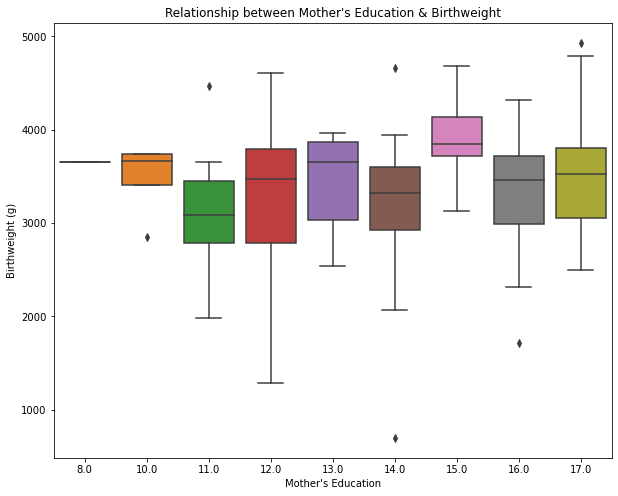

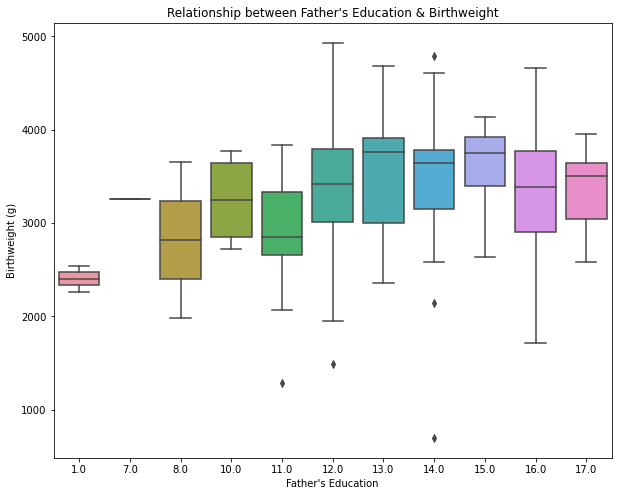

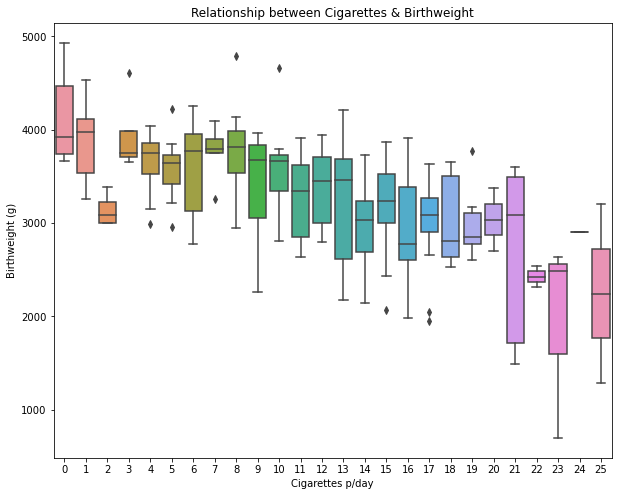

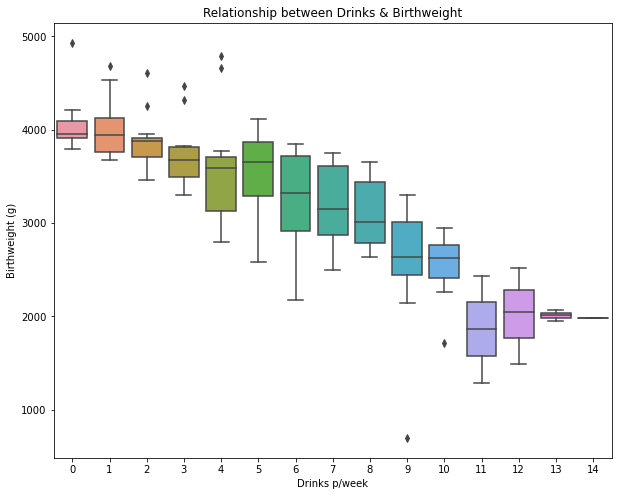


Count of Education, Prenatal Care & Lifestyle (interval data)

----------
Mother's Education
----------
8.0      1
10.0     4
11.0    11
12.0    56
13.0    15
14.0    31
15.0     9
16.0    51
17.0    18
Name: meduc, dtype: int64


----------
Father's Education
----------
1.0      2
7.0      1
8.0      2
10.0     4
11.0    10
12.0    60
13.0     6
14.0    28
15.0     4
16.0    53
17.0    26
Name: feduc, dtype: int64

-----------
Month prenatal care began
----------
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64

---------------------
Number of total prenatal visits
----------
2.0      1
3.0      2
5.0      3
6.0      7
7.0      7
8.0     15
9.0     12
10.0    24
11.0    15
12.0    68
13.0     9
14.0     7
15.0     9
16.0     5
17.0     2
18.0     1
19.0     1
20.0     3
25.0     1
30.0     2
31.0     1
35.0     1
Name: npvis, dtype: int64

---------------------
Cigs per Day
----------
0      9
1      8
2      4
3      4
4      8
5     11
6   

In [21]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


## mother's education ##
# developing a boxplot
sns.boxplot(x     = 'meduc',
            y     = 'bwght',
            data  = birthweight)


# titles and labels
plt.title(label   = "Relationship between Mother's Education & Birthweight")
plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = 'Birthweight (g)')


#####################################

fig, ax = plt.subplots(figsize = (10, 8))

## father's education ##
# developing a boxplot
sns.boxplot(x     = 'feduc',
            y     = 'bwght',
            data  = birthweight)


# titles and labels
plt.title(label   = "Relationship between Father's Education & Birthweight")
plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = 'Birthweight (g)')


# displaying the plot
plt.tight_layout
plt.show()

#####################################
fig, ax = plt.subplots(figsize = (10, 8))

## average number of cigarettes per day ##
# developing a boxplot
sns.boxplot(x     = 'cigs',
            y     = 'bwght',
            data  = birthweight)


# titles and labels
plt.title(label   = "Relationship between Cigarettes & Birthweight")
plt.xlabel(xlabel = "Cigarettes p/day")
plt.ylabel(ylabel = 'Birthweight (g)')


#####################################
fig, ax = plt.subplots(figsize = (10, 8))

## number of drinks per week ##
# developing a boxplot
sns.boxplot(x     = 'drink',
            y     = 'bwght',
            data  = birthweight)


# titles and labels
plt.title(label   = "Relationship between Drinks & Birthweight")
plt.xlabel(xlabel = "Drinks p/week")
plt.ylabel(ylabel = 'Birthweight (g)')


# displaying the plot
plt.tight_layout
plt.show()

####################################

# printing value counts for interval explanatory variables
print(f"""
Count of Education, Prenatal Care & Lifestyle (interval data)
==================

----------
Mother's Education
----------
{birthweight['meduc'].value_counts(normalize = False).sort_index()}


----------
Father's Education
----------
{birthweight['feduc'].value_counts(normalize = False).sort_index()}

-----------
Month prenatal care began
----------
{birthweight['monpre'].value_counts(normalize = False).sort_index()}

---------------------
Number of total prenatal visits
----------
{birthweight['npvis'].value_counts(normalize = False).sort_index()}

---------------------
Cigs per Day
----------
{birthweight['cigs'].value_counts(normalize = False).sort_index()}

---------------------
Drink per Week
----------
{birthweight['drink'].value_counts(normalize = False).sort_index()}


""")


Key takeaways:
- Most mothers and fathers completed high school and have some college degree
- Most mothers started their prenatal care in February
- Most mothers smoked between 5-17 cigarettes a day in this dataset
- Most mothers had 1-10 drinks a week in this dataset


# Feature Engineering - Encoding Categorical Data¶

In [22]:
# printing columns
print(f"""
Males
------
{birthweight['male'].value_counts()}


Race: White Mother 
----------
{birthweight['mwhte'].value_counts()}


Race: White Father 
----------
{birthweight['fwhte'].value_counts()}


Race: Black Mother:
-------------
{birthweight['mblck'].value_counts()}


Race: Black Father:
-------------
{birthweight['fblck'].value_counts()}


Race: Mother with Other Race:
-------------
{birthweight['moth'].value_counts()}

Race: Father with Other Race:
-------------

{birthweight['foth'].value_counts()}

""")



Males
------
1    108
0     88
Name: male, dtype: int64


Race: White Mother 
----------
0    143
1     53
Name: mwhte, dtype: int64


Race: White Father 
----------
0    128
1     68
Name: fwhte, dtype: int64


Race: Black Mother:
-------------
0    121
1     75
Name: mblck, dtype: int64


Race: Black Father:
-------------
0    129
1     67
Name: fblck, dtype: int64


Race: Mother with Other Race:
-------------
0    128
1     68
Name: moth, dtype: int64

Race: Father with Other Race:
-------------

0    135
1     61
Name: foth, dtype: int64




Key takeways:
1. Men are overrepresented in the data when in fact there should be more data 
drawn on women who actually experience the pregnancy

2. The ratio of each race group are approx. proportionate to the full dataset

# Predictive Modeling

In [23]:
# placeholder variables 
birthweight['mage_under30']  = 0
birthweight['mage_30_40']    = 0
birthweight['mage_40_50']    = 0
birthweight['mage_over50']   = 0

for index, value in birthweight.iterrows():
    
    # Creating a dummy for mage under 30 years old
    if birthweight.loc[index, 'mage'] < 30:
        birthweight.loc[index, 'mage_under30'] = 1

        
    # Creating a dummy for mage between 30 and 40 years old
    if birthweight.loc[index, 'mage'] >= 30 and birthweight.loc[index, 'mage'] <40:
        birthweight.loc[index, 'mage_30_40'] = 1
        
        
    # Creating a dummy for mage between 40 and 50 years old
    if birthweight.loc[index, 'mage'] >= 40 and birthweight.loc[index, 'mage'] <50:
        birthweight.loc[index, 'mage_40_50'] = 1
        
    # Creating a dummy for mage over 50 years old
    if birthweight.loc[index, 'mage'] >= 50:
        birthweight.loc[index, 'mage_over50'] = 1

In [24]:
# checking results of mage bins to see that it is correct
birthweight[  ['mage_under30', 'mage_30_40', 'mage_40_50', 'mage_over50', 'mage']  ].tail(n = 10)

,mage_under30,mage_30_40,mage_40_50,mage_over50,mage
186,0,0,1,0,42
187,0,1,0,0,35
188,0,1,0,0,33
189,0,0,1,0,49
190,0,0,1,0,43
191,0,1,0,0,30
192,0,0,1,0,41
193,0,1,0,0,33
194,0,1,0,0,31
195,0,1,0,0,39


In [25]:
# placeholder variables 
birthweight['fage_under30']  = 0
birthweight['fage_30_40']    = 0
birthweight['fage_40_50']    = 0
birthweight['fage_over50']   = 0

for index, value in birthweight.iterrows():
    
    # Creating a dummy for fage under 30 years old
    if birthweight.loc[index, 'fage'] < 30:
        birthweight.loc[index, 'fage_under30'] = 1

        
    # Creating a dummy for fage between 30 and 40 years old
    if birthweight.loc[index, 'fage'] >= 30 and birthweight.loc[index, 'fage'] <40:
        birthweight.loc[index, 'fage_30_40'] = 1
        
        
    # Creating a dummy for fage between 40 and 50 years old
    if birthweight.loc[index, 'fage'] >= 40 and birthweight.loc[index, 'fage'] <50:
        birthweight.loc[index, 'fage_40_50'] = 1
        
    # Creating a dummy for fage over 50 years old
    if birthweight.loc[index, 'fage'] >= 50:
        birthweight.loc[index, 'fage_over50'] = 1

In [26]:
# checking results of fage bins to see that it is correct
birthweight[  ['fage_under30', 'fage_30_40', 'fage_40_50', 'fage_over50', 'fage']  ].tail(n = 10)

,fage_under30,fage_30_40,fage_40_50,fage_over50,fage
186,1,0,0,0,26
187,0,1,0,0,35
188,0,1,0,0,35
189,0,1,0,0,39
190,0,1,0,0,36
191,0,1,0,0,38
192,0,0,1,0,47
193,0,1,0,0,38
194,0,0,1,0,43
195,0,1,0,0,38


In [27]:
# Creating variables to amplify impact in bwght based on previous correlation matrix
# A lot of trial and error was done with the variables

# Variable for parents age combined to use for predictive modeling
birthweight['parents_age'] = birthweight['mage'] * (birthweight['fage']/2) # Dividing by 2 because father's age has some impact on birthweight

# Variable for black parents combined
birthweight['black_parents'] = birthweight['fblck'] * birthweight['mblck'] 

# Variable for white parents combined
birthweight['white_parents'] = birthweight['fwhte'] * birthweight['mwhte'] 

# Variable for parents with other race combined
birthweight['other_parents'] = birthweight['foth'] * birthweight['moth'] 

# Variable for parents education combined
birthweight['parents_education'] = birthweight['feduc'] * birthweight['meduc']

# Variable for cigs & drinks combined
birthweight['mlifestyle'] = birthweight['cigs'] * birthweight['drink']

# Variable for all races
birthweight['all_races'] = (birthweight['fblck'] * birthweight['mblck'] * \
                           birthweight['fwhte'] * birthweight['mwhte'] * \
                           birthweight['foth'] * birthweight['moth'] + 0.001)

# Variable for all races excluding fwhte
birthweight['all_races_not_fwhte'] = (birthweight['fblck'] * birthweight['mblck'] * \
                           birthweight['mwhte'] * \
                           birthweight['foth'] * birthweight['moth'] + 0.001)

# Variable feduc & foth
birthweight['feduc_foth'] = birthweight['feduc'] * birthweight['foth'] 

# Variable feduc & foth & moth
birthweight['feduc_foth_moth'] = birthweight['feduc'] * birthweight['foth'] * \
                                 birthweight['moth']

# all_races & parents_educ combined due to correlation matrix
birthweight['all_races_educ'] = birthweight['all_races'] * birthweight['parents_education']

# Variable feduc & foth
birthweight['monpre_npvis'] = birthweight['monpre'] * birthweight['npvis'] 


Research show that factors, such as maternal race, education, smoking and older fathers have some impact on birthweight. 
This is why I created various features with different combinations, to see its impact on the predictive modeling done below.

Source:
Cogswell, M. E., &amp; Yip, R. (1995). The influence of fetal and maternal factors on the distribution of birthweight. 
Seminars in Perinatology, 19(3), 222–240. 
https://doi.org/10.1016/s0146-0005(05)80028-x 
    
Reichman, N. E., &amp; Teitler, J. O. (2006). Paternal age as a risk factor for low birthweight. 
American Journal of Public Health, 96(5), 862–866. https://doi.org/10.2105/ajph.2005.066324 




In [28]:
## Model Example 1 (Bwght) ##

# building a fit model with highest correlations to bwght

# blueprinting a model type
lm_fit = smf.ols(formula = """ bwght ~ drink + cigs + parents_age""",
                                data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.07e-51
Time:                        20:42:40   Log-Likelihood:                -1424.0
No. Observations:                 196   AIC:                             2856.
Df Residuals:                     192   BIC:                             2869.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4681.7477     70.861     66.069      0.000    4541.982    4821.514
drink        -115.0060      9.441    -12.181      0.000    -133.628     -96.384
cigs          -35.6022      4.401     -8.090      0.000     -44.282     -26.922
parents_age    -0.4142      0.071     -5.861      0.000      -0.554      -0.275
==============================================================================
Omnibus:                        5.124   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                7.169
Skew:                           0.062   Prob(JB):                       0.0277
Kurtosis:                       3.929   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
## Model Example 2 (Bwght) ##

# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """ bwght ~ parents_age + cigs + drink + parents_education """,
                                data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           2.75e-51
Time:                        20:42:40   Log-Likelihood:                -1422.3
No. Observations:                 196   AIC:                             2855.
Df Residuals:                     191   BIC:                             2871.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4517.1593    113.759     39.708      0.000    4292.773    4741.545
parents_age          -0.4072      0.070     -5.789      0.000      -0.546      -0.268
cigs                -36.6879      4.413     -8.314      0.000     -45.392     -27.983
drink              -112.9519      9.449    -11.954      0.000    -131.589     -94.314
parents_education     0.8148      0.442      1.842      0.067      -0.058       1.687
==============================================================================
Omnibus:                        4.746   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                6.523
Skew:                          -0.001   Prob(JB):                       0.0383
Kurtosis:                       3.894   Cond. No.                     4.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
## Model Example 3 (Bwght) ##

# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """ bwght ~ parents_age + cigs + drink +
                               all_races_not_fwhte """,
                                data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.07e-51
Time:                        20:42:40   Log-Likelihood:                -1424.0
No. Observations:                 196   AIC:                             2856.
Df Residuals:                     192   BIC:                             2869.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4681.7431     70.861     66.069      0.000    4541.977    4821.509
parents_age            -0.4142      0.071     -5.861      0.000      -0.554      -0.275
cigs                  -35.6022      4.401     -8.090      0.000     -44.282     -26.922
drink                -115.0060      9.441    -12.181      0.000    -133.628     -96.384
all_races_not_fwhte     4.6817      0.071     66.069      0.000       4.542       4.822
==============================================================================
Omnibus:                        5.124   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                7.169
Skew:                           0.062   Prob(JB):                       0.0277
Kurtosis:                       3.929   Cond. No.                     2.16e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
## Model Example 4 (Bwght) ##

# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """ bwght ~ parents_age + (cigs*drink) +
                               all_races_not_fwhte """,
                                data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           7.53e-52
Time:                        20:42:40   Log-Likelihood:                -1420.9
No. Observations:                 196   AIC:                             2852.
Df Residuals:                     191   BIC:                             2868.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4487.5704    105.432     42.564      0.000    4279.610    4695.531
parents_age            -0.3922      0.070     -5.578      0.000      -0.531      -0.254
cigs                  -18.0427      8.352     -2.160      0.032     -34.518      -1.568
drink                 -78.1185     17.648     -4.426      0.000    -112.928     -43.309
cigs:drink             -3.2796      1.332     -2.461      0.015      -5.908      -0.651
all_races_not_fwhte     4.4876      0.105     42.564      0.000       4.280       4.696
==============================================================================
Omnibus:                        6.254   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                8.874
Skew:                           0.149   Prob(JB):                       0.0118
Kurtosis:                       3.999   Cond. No.                     2.18e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.36e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
## Model Example 5 (Bwght) ##

# building a fit model with highest correlations to bwght

# blueprinting a model type
lm_fit = smf.ols(formula = """ bwght ~ cigs + drink + parents_age +
                               all_races_not_fwhte """,
                                data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.07e-51
Time:                        20:42:40   Log-Likelihood:                -1424.0
No. Observations:                 196   AIC:                             2856.
Df Residuals:                     192   BIC:                             2869.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4681.7431     70.861     66.069      0.000    4541.977    4821.509
cigs                  -35.6022      4.401     -8.090      0.000     -44.282     -26.922
drink                -115.0060      9.441    -12.181      0.000    -133.628     -96.384
parents_age            -0.4142      0.071     -5.861      0.000      -0.554      -0.275
all_races_not_fwhte     4.6817      0.071     66.069      0.000       4.542       4.822
==============================================================================
Omnibus:                        5.124   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                7.169
Skew:                           0.062   Prob(JB):                       0.0277
Kurtosis:                       3.929   Cond. No.                     2.16e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
## Model Example 6 (Bwght) ##
# Final model

# building a fit model with highest correlations to bwght with age bins

# blueprinting a model type
lm_fit = smf.ols(formula = """ bwght ~ mage_under30 + mage_30_40 + mage_40_50 +
                                       cigs + drink + fage_30_40 """,
                                data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     81.54
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           8.80e-50
Time:                        20:42:40   Log-Likelihood:                -1420.9
No. Observations:                 196   AIC:                             2856.
Df Residuals:                     189   BIC:                             2879.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3988.4117     97.861     40.756      0.000    3795.373    4181.451
mage_under30   313.9695    101.341      3.098      0.002     114.065     513.874
mage_30_40     364.2059     81.936      4.445      0.000     202.580     525.832
mage_40_50     350.8780     81.053      4.329      0.000     190.993     510.764
cigs           -36.8062      4.364     -8.435      0.000     -45.414     -28.199
drink         -116.4493      9.321    -12.493      0.000    -134.835     -98.063
fage_30_40     147.3788     53.745      2.742      0.007      41.361     253.397
==============================================================================
Omnibus:                       10.360   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               21.532
Skew:                          -0.129   Prob(JB):                     2.11e-05
Kurtosis:                       4.603   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Training & Testing Set

In [34]:
# Creating training & test sets

# preparing explanatory variable data
birthweight_data   = birthweight.drop(['bwght', 'omaps', 'fmaps'],
                                axis = 1)


# preparing response variable data
birthweight_target = birthweight.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_final.shape}
y-side: {y_train_final.shape[0]}


Testing Data
------------
X-side: {x_test_final.shape}
y-side: {y_test_final.shape[0]}
""")


Training Data
-------------
X-side: (147, 38)
y-side: 147


Testing Data
------------
X-side: (49, 38)
y-side: 49



In [35]:
# declaring set of x-variables that I used for my OLS regression
x_variables = ['mage_under30', 'mage_30_40', 'mage_40_50',
                     'cigs', 'drink', 'fage_30_40']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")



mage_under30 +
mage_30_40 +
mage_40_50 +
cigs +
drink +
fage_30_40 +


In [36]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train_final, y_train_final], axis = 1)


# Step 1: build a model with only the training set
lm_best = smf.ols(formula =  """bwght ~ mage_under30 + mage_30_40 + mage_40_50 +
                                       cigs + drink + fage_30_40 """,
                                data = birthweight_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     62.85
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           2.60e-37
Time:                        20:42:40   Log-Likelihood:                -1068.6
No. Observations:                 147   AIC:                             2151.
Df Residuals:                     140   BIC:                             2172.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3895.4563    111.976     34.788   

In [37]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[ :, x_variables ]


# preparing response variable
birthweight_target = birthweight.loc[ :, "bwght"]


###############################################
## setting up more than one train-test split ##
###############################################

# OLS p-value x-dataset (normal Y)
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [38]:
# INSTANTIATING a model object
# OLS model
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_final, y_train_final)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_final)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_final, y_train_final).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_final, y_test_final).round(4)) # using R-square

lr_train_score = lr.score(x_train_final, y_train_final).round(4)
lr_test_score  = lr.score(x_test_final, y_test_final).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


OLS Training Score : 0.7293
OLS Testing Score  : 0.6616
OLS Train-Test Gap : 0.0677


In [39]:
import sklearn.linear_model # linear models

In [40]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_final, y_train_final)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_final)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_final, y_train_final).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_final, y_test_final).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_final, y_train_final).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_final, y_test_final).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.725
Lasso Testing Score  : 0.6976
Lasso Train-Test Gap : 0.0274


In [41]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_final, y_train_final)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_final)


print('Training Score:', ard_model.score(x_train_final, y_train_final).round(4))
print('Testing Score :',  ard_model.score(x_test_final, y_test_final).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_final, y_train_final).round(4)
ard_test_score  = ard_model.score(x_test_final, y_test_final).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7285
Testing Score : 0.677
ARD Train-Test Gap : 0.0515


In [52]:
# comparing results

print(f"""
Model      Train Score                  
-----      -----------                  
OLS        {lr_train_score}      
*Lasso     {lasso_train_score}     
ARD        {ard_train_score}           

Model      Test Score           
-----      ----------           
OLS        {lr_test_score}      
*Lasso     {lasso_test_score}   
ARD        {ard_test_score}     


Model      Gap Score           
-----      ----------           
OLS        {lr_test_gap}
*Lasso     {lasso_test_gap}
ARD        {ard_test_gap} 

* final model (Lasso)
""")



Model      Train Score                  
-----      -----------                  
OLS        0.7293      
*Lasso     0.725     
ARD        0.7285           

Model      Test Score           
-----      ----------           
OLS        0.6616      
*Lasso     0.6976   
ARD        0.677     


Model      Gap Score           
-----      ----------           
OLS        0.0677
*Lasso     0.0274
ARD        0.0515 

* final model (Lasso)



In [43]:
# Trying KNN to see whether my test score will improve
# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


In [44]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(birthweight_data)


# TRANSFORMING our data after fit
# make sure you use small x
x_scaled = scaler.transform(birthweight_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,...,196.00,196.00,196.00,196.00,196.0,196.0,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,-1.0,-1.0,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.27,-1.82,-4.98,-1.80,-1.80,-1.11,-0.61,...,-0.61,-0.64,-3.25,-1.12,-1.0,-1.0,-0.67,-0.64,-3.25,-1.29
25%,-0.70,-0.94,-0.25,-0.38,-0.51,-0.72,-0.81,-0.47,-1.11,-0.61,...,-0.61,-0.64,-0.91,-0.78,-1.0,-1.0,-0.67,-0.64,-0.91,-0.69
50%,-0.11,0.04,-0.25,0.09,-0.14,0.06,0.01,-0.13,0.90,-0.61,...,-0.61,-0.64,-0.07,-0.30,-1.0,-1.0,-0.67,-0.64,-0.07,-0.09
75%,0.57,1.03,0.49,0.09,0.41,0.83,0.71,0.62,0.90,1.64,...,1.64,1.56,1.05,0.35,-1.0,-1.0,1.50,1.56,1.05,0.36
max,3.02,1.52,4.19,5.54,3.76,1.22,2.31,2.87,0.90,1.64,...,1.64,1.56,1.63,3.58,-1.0,-1.0,1.64,1.69,1.63,5.09


In [45]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = birthweight_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(birthweight_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
mage                   1.045276e+02
meduc                  4.140436e+00
monpre                 1.827025e+00
npvis                  1.784056e+01
fage                   8.027767e+01
feduc                  6.656680e+00
cigs                   3.703571e+01
drink                  8.964077e+00
male                   2.473969e-01
mwhte                  1.972876e-01
mblck                  2.362297e-01
moth                   2.265723e-01
fwhte                  2.265723e-01
fblck                  2.249844e-01
foth                   2.143638e-01
log_bwght              5.366574e-02
log_fage               4.669654e-02
log_mage               5.933853e-02
mage_under30           1.112818e-01
mage_30_40             2.406029e-01
mage_40_50             2.143638e-01
mage_over50            1.331476e-01
fage_under30           9.566327e-02
fage_30_40             2.478915e-01
fage_40_50             1.822938e-01
fage_over50            9.566327e-02
parents_age      

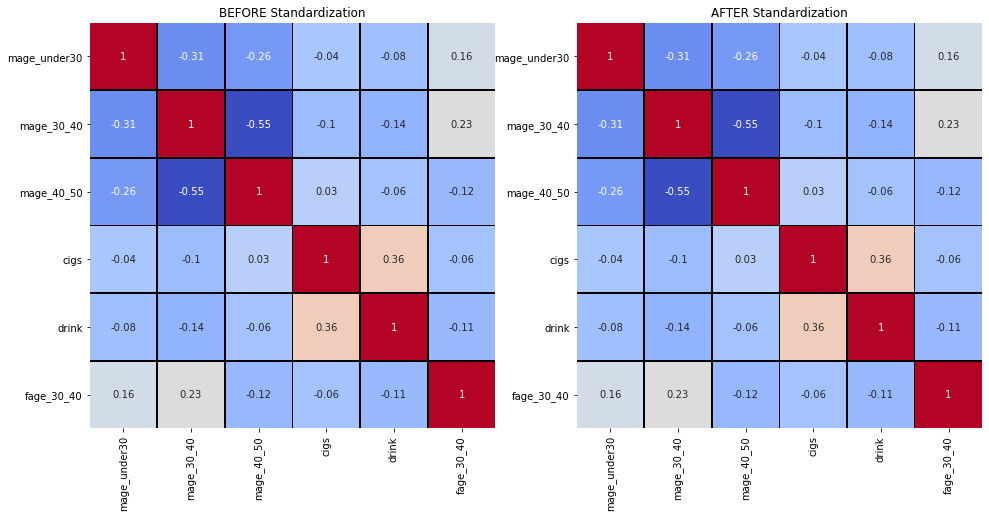

In [46]:
##############################################################################
# Unscaled Dataset
##############################################################################

# subsetting the original dataset
birthweight_subset = birthweight_data.loc[ : , ['mage_under30', 'mage_30_40', 
                                                'mage_40_50', 'cigs', 'drink', 
                                                'fage_30_40']]


# UNSCALED correlation matrix
df_corr = birthweight_subset.corr().round(2)


# setting figure size and plot window
fig, ax = plt.subplots(figsize = (16, 16))
plt.subplot(1, 2, 1)


# heatmap of UNSCALED correlations
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black', 
            linewidths = 0.5)



##############################################################################
# Scaled Dataset
##############################################################################

# SCALED correlation matrix
df_scaled_corr = x_scaled_df.loc[ : , ['mage_under30', 'mage_30_40', 
                                                'mage_40_50', 'cigs', 'drink', 
                                                'fage_30_40']].corr().round(2)


# titling the plot
plt.title("BEFORE Standardization")


# setting plot window
plt.subplot(1, 2, 2)


# heatmap of SCALED correlations
sns.heatmap(df_scaled_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            cbar = False,
            linecolor  = 'black',
            linewidths = 0.5)


# titling the plot
plt.title("AFTER Standardization")
plt.show()

In [47]:
# this is the exact code I was using before
# making sure I do it in this order, x-train, x-test, y-train, y-test
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(
            x_scaled_df,
            birthweight_target,
            test_size    = 0.25,
            random_state = 219)

In [48]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 4)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train_final, y_train_final)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_final)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_final, y_train_final).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_final, y_test_final).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_final, y_train_final).round(4)
knn_reg_score_test  = knn_reg.score(x_test_final, y_test_final).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.7624
KNN Testing Score : 0.4427
KNN Train-Test Gap: 0.3197


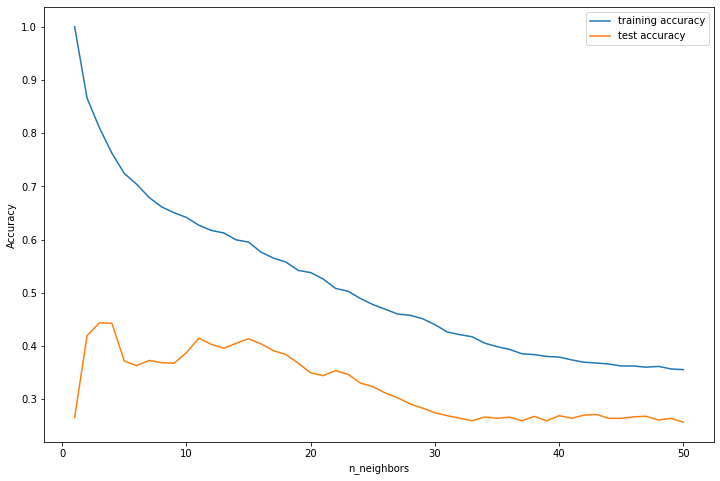

In [49]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_final, y_train_final)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_final, y_train_final))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_final, y_test_final))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [50]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 3


Since the KNN score is still not at a satisfactory level, 
the final model chosen is implementing the Lasso regression testing score.